In [110]:
import os
from random import sample
import random
import csv
import numpy as np
import tensorflow as tf

seed = 2023
np.random.seed(seed)  

In [111]:
def readImages(data_dir, mask_dir = ''):
    image_ids = os.listdir(data_dir)
    images = []
    masks = []
    for i in range(len(image_ids)):

        path_images = f"{data_dir}/{image_ids[i]}/images"
        filename_image = os.listdir(path_images)[0]
        image = tf.keras.utils.load_img(f"{path_images}/{filename_image}")
        images.append(image)

        if mask_dir:
            path_masks = f"{data_dir}/{image_ids[i]}/{mask_dir}"
            filename_mask = os.listdir(path_masks)[0]
            mask = tf.keras.utils.load_img(f"{path_masks}/{filename_mask}")
            masks.append(mask)
    dict0 = {}
    dict0['imageIDs'] = image_ids
    dict0['images'] = images
    if mask_dir: dict0['masks'] = masks
    return dict0

In [112]:
train_dict = readImages("./data/stage1_train", mask_dir = 'combined_masks')
val_dict = readImages("./data/stage1_test", mask_dir = 'combined_masks')
test_dict = readImages("./data/stage2_test_final")

In [7]:
import pickle
data_dict = {}
data_dict['train_dict'] = train_dict
data_dict['val_dict'] = val_dict
data_dict['test_dict'] = test_dict
data_set = open('./data/data_set.obj', 'wb')
pickle.dump(data_dict,data_set)
data_set.close()

In [8]:
import pickle
data_set = open('./data/data_set.obj', 'rb')
data_dict = pickle.load(data_set)
data_set.close()
train_dict = data_dict['train_dict']
val_dict = data_dict['val_dict']
test_dict = data_dict['test_dict']

Image and mask from train set


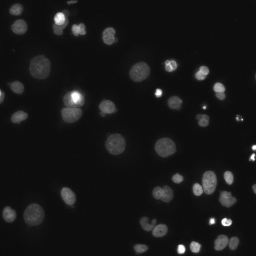

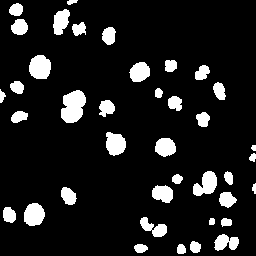

(256, 256)
Image and mask from validation set


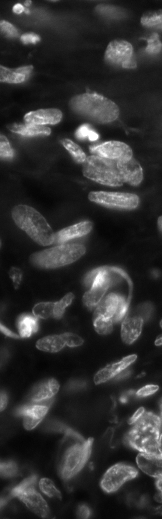

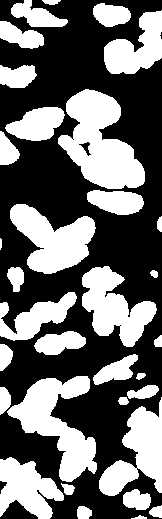

In [113]:
# display
# train image
imageIDs_train = train_dict['imageIDs']
images_train = train_dict['images']
masks_train = train_dict['masks']
ix = random.randint(0, len(imageIDs_train))
print("Image and mask from train set")
display(images_train[ix])
display(masks_train[ix])

# validation image
imageIDs_val = val_dict['imageIDs']
images_val = val_dict['images']
masks_val = val_dict['masks']
ix = random.randint(0, len(imageIDs_val))
print("Image and mask from validation set")
display(images_val[ix])
display(masks_val[ix])
